# Working with Sites

A Site is container for web addressable content. Sites is a feature supported in both ArcGIS Online (through ArcGIS Hub) and ArcGIS Enterprise. 

We will start by exploring Sites as supported in ArcGIS Hub. A site within ArcGIS Hub exists on it's own or could be part of an initiative. 

In [1]:
from arcgishub.hub import Hub
from arcgis import GIS

In [6]:
myhub = Hub("https://dcdev.maps.arcgis.com/", "mmajumdar_dcdev", "password")
gis = GIS("https://dcdev.maps.arcgis.com/", "mmajumdar_dcdev", "password")

### Creating initiative with site

In [4]:
initiative1 = myhub.initiatives.add(title='initiative-site-Hub')
initiative1.item

<Item title:"initiative-site-Hub" type:Hub Initiative owner:mmajumdar_dcdev>

### Creating open data site

In order to create a stand alone site, you provide the site title, subdomain (for the site url) and the group to share it with as parameters to the `add()` function.

You start by fetching the group to share it with.

In [7]:
data_group = gis.groups.get('ad321eb4f9ee4b479cc284fcac9af3e4')

In [9]:
title = 'python site 1234'
myhub.sites.add(title=title, subdomain=title, groups=[data_group])

<Site title:"python site 1234" owner:mmajumdar_dcdev>

### Searching for sites

In [10]:
site = myhub.sites.search(title=title, owner='mmajumdar_dcdev')[0]
site.item

<Item title:"python site 1234" type:Hub Site Application owner:mmajumdar_dcdev>

In [12]:
site.url

'https://python-site-1234-dcdev.hub.arcgis.com'

### Fetching a site

In [13]:
s = myhub.sites.get(site.itemid)
s

<Site title:"python site 1234" owner:mmajumdar_dcdev>

### Update and Delete a site

In [14]:
print(s.description)

None


In [15]:
s.update(site_properties={'description': 'Testing site update'})

True

In [18]:
print(s.description)

Testing site update


Now let's delete this site.

In [23]:
site_del = myhub.sites.get('3195509613c84eea9fb28dc669d11403')

In [24]:
site_del.delete()

True

### Verify deletion

In [25]:
myhub.sites.get(site_del.itemid)

Item does not exist or is inaccessible.


AttributeError: 'NoneType' object has no attribute 'typeKeywords'

### Copy a site within the same org

<Item title:"Manushi test" type:Hub Site Application owner:mmajumdar_dcdev>
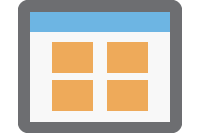

In [26]:
s = myhub.sites.get('38fe239fb959490ea594a4b886904482')
s.item

In [27]:
s2 = myhub.sites.clone(s)
s2.item

<Item title:"Manushi test-copy-1564674020742" type:Hub Site Application owner:mmajumdar_dcdev>

### Clone site to another AGOL org

In [28]:
newHub = Hub("https://cityx.maps.arcgis.com", "cityofx_admin", "password")

In [31]:
s_clone = newHub.sites.clone(s)
s_clone.item

<Item title:"Manushi test-copy-1564674446099" type:Hub Site Application owner:cityofx_admin>

In [32]:
s_clone.delete()

## Testing Enterprise Sites

In [33]:
eHub = Hub("http://dev0004025.esri.com/portal", "username", "password")
egis = GIS("http://dev0004025.esri.com/portal", "username", "password")

In [35]:
g = egis.groups.get('b2b9c5459193468ab461372ec5353957')

### Add Enterprise site

In [36]:
title = 'Manushi xprise site python'
esite = eHub.sites.add(title=title, subdomain=title, groups=[g])
esite.item

<Item title:"Manushi xprise site python" type:Site Application owner:admin>

### Update Enterprise site

In [37]:
print(esite.description)

None


In [38]:
esite.update(site_properties={'description': 'Testing enterprise-site update'})

True

In [39]:
print(esite.description)

Testing enterprise-site update


### Deleting site

In [40]:
esite.delete()

True

### Fetching site

In [42]:
s = eHub.sites.get('62144559816c436ca990779eb666577b')

In [43]:
s.item

<Item title:"Manushi py test" type:Site Application owner:admin>

### Cloning from enterprise to AGOL

In [44]:
agol_s = myhub.sites.clone(s)
agol_s.item

<Item title:"Manushi py test-copy-1564674785582" type:Hub Site Application owner:mmajumdar_dcdev>

### Cloning from AGOL to Enterprise

<Item title:"Manushi test" type:Hub Site Application owner:mmajumdar_dcdev>
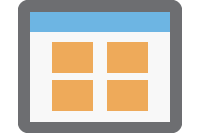

In [45]:
site = myhub.sites.get('38fe239fb959490ea594a4b886904482')
site.item

In [46]:
e_site = eHub.sites.clone(site)
e_site.item

<Item title:"Manushi test-copy-1564674801156" type:Site Application owner:admin>